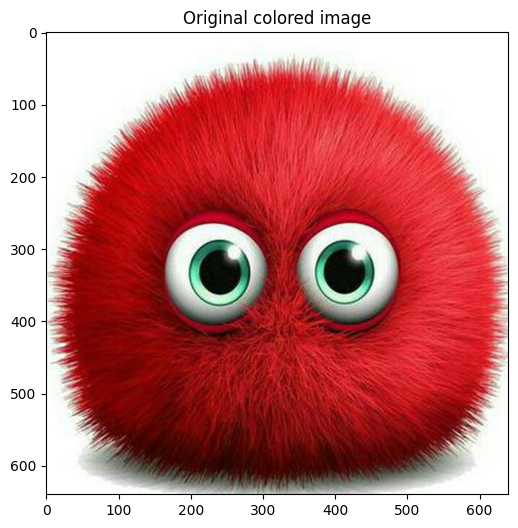

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
face = plt.imread("path_image.jpg")
plt.imshow(face )
plt.title("Original colored image")
plt.show()

In [12]:
def random_zero_image(image, block_size):
    h, w= image.shape
    random_h = np.random.randint(0, h - block_size[0] + 1)
    random_w = np.random.randint(0, w - block_size[1] + 1)
    image[random_h:random_h + block_size[0], random_w:random_w + block_size[1]] = 0
    return image

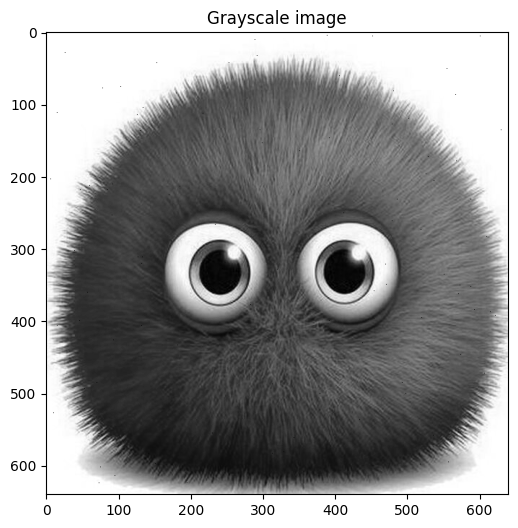

In [31]:
# We get the mean of the last dimension (channels)
gray_face = np.mean(face, axis=-1)

block_size = (1,1)
# Apply random zeroing to the image
for _ in range(100):
    gray_face= random_zero_image(gray_face, block_size)

plt.figure(figsize=(6,6))
plt.imshow(gray_face, cmap="gray")
plt.title("Grayscale image")
plt.show()

In [32]:
from sklearn.decomposition import TruncatedSVD

k = 100 # We define k (number of components)
svd = TruncatedSVD(n_components=k)
svd.fit(gray_face)
U, S, V = svd.transform(gray_face), svd.singular_values_, svd.components_

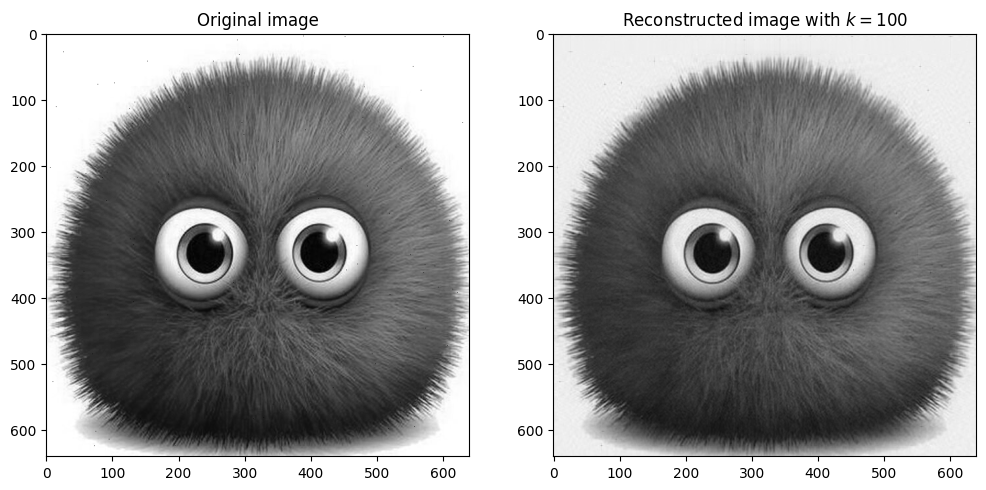

In [33]:
reconstructed_face = U @ V

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(gray_face, cmap="gray")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.title(f"Reconstructed image with $k={k}$")
plt.imshow(reconstructed_face, cmap="gray")
plt.show()